[View in Colaboratory](https://colab.research.google.com/github/gtambi143/ADABoost/blob/master/ADABoost_Regression.ipynb)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
#loading the Housing Price dataset. Regression Dataset
boston_data = datasets.load_boston()

train_x, test_x, train_y, test_y = train_test_split(boston_data.data, boston_data.target, test_size = 0.33, random_state = 0)

# **Working of ADABoost Regression**
An AdaBoost regressor.

An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

This class implements the algorithm known as AdaBoost.R2 [2].

# **Using Linear Loss Function**

In [41]:
model_ada = ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)

model_ada.fit(train_x, train_y)

model_ada.score(train_x,train_y)

predicted_test = model_ada.predict(test_x)

metrics.mean_squared_error(predicted_test, test_y)


21.540875778080107

# **Using Square Loss Function**

In [43]:
model_ada = ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='square', random_state=None)

model_ada.fit(train_x, train_y)

model_ada.score(train_x,train_y)

predicted_test = model_ada.predict(test_x)

metrics.mean_squared_error(predicted_test, test_y)

20.325319882372575

# **Using Exponential Loss Function**

In [45]:
model_ada = ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='exponential', random_state=None)

model_ada.fit(train_x, train_y)

model_ada.score(train_x,train_y)

predicted_test = model_ada.predict(test_x)

metrics.mean_squared_error(predicted_test, test_y)

20.64046812009873

# **Some useful function for the ADABoost model**

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

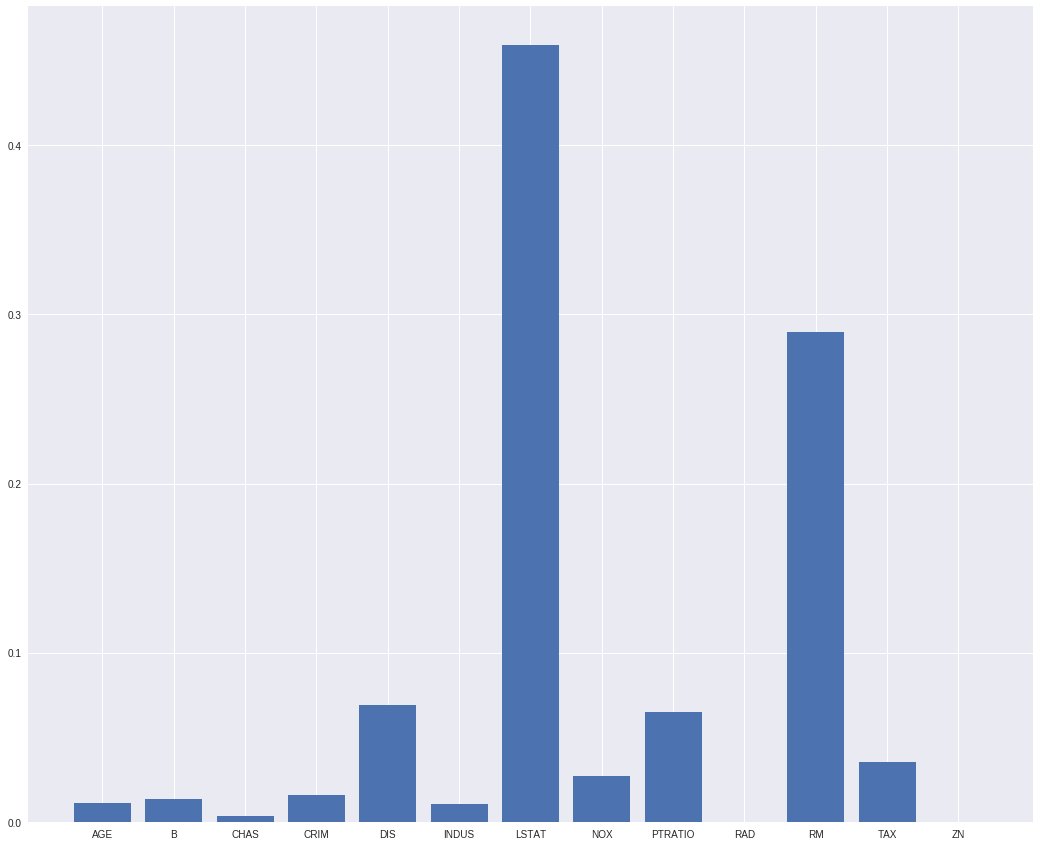

In [47]:
model_ada.feature_importances_ #this will give the feature importance of the features. Higher the value higher the importance.

#plotting the feature importance
plt.figure(figsize=(18,15))
plt.bar(boston_data.feature_names, model_ada.feature_importances_)

model_ada.base_estimator_